## 1. Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Coleta de Dados

In [2]:
def get_data(path):
    return pd.read_csv(path)

data = get_data('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.DataFrame(data.describe().drop('count')).T

,mean,std,min,25%,50%,75%,max
id,4580301520.86,2876565571.31,1000102.00,2123049194.00,3904930410.00,7308900445.00,9900000190.00
price,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,3.41,0.65,1.00,3.00,3.00,4.00,5.00


## 3. Limpeza de Dados

- Remover duplicatas na coluna id
- Transformar tipo da coluna 'date' para datetime
- Converter medidas de pés quadrados (sqft) para metros (sqrt)
- Adicionar colunas de dia, semana, mês e ano
- Adicionar coluna com a estação do ano

### 3.1 Transformations

In [6]:
# removendo valores duplicados
data = data.drop_duplicates('id')

# Convertendo para datimetime
data['date'] = pd.to_datetime(data['date'], format="%Y-%m-%d")

# Convertendo pés quadrados para metros quadrados (m²)
data['sqft_living']   = data['sqft_living']*0.092903
data['sqft_lot']      = data['sqft_lot']*0.092903
data['sqft_living15'] = data['sqft_living15']*0.092903
data['sqft_lot15']    = data['sqft_lot15']*0.092903

# Modificando feature de Waterfront
data['waterfront'] = data['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no')

### 3.2 New Features

In [7]:
# Adicionar colunas de dia, semana, mês e ano

data['year'] = 'NA'
data['week_of_year'] = 'NA'
data['month'] = 'NA'
data['day'] = 'NA'

data['year'] = data['date'].dt.year
data['week_of_year'] = data['date'].dt.isocalendar().week
data['month'] = data.date.dt.strftime("%Y-%m")
data['day'] = data['date'].dt.day

# Adicionar coluna com a estação do ano
data['seasons'] = data['date'].apply(lambda x: 'Spring' if (x.day_of_year > 80) & (x.day_of_year <= 173) else
                                               'Summer' if (x.day_of_year > 173) & (x.day_of_year <= 267) else
                                               'Fall'   if (x.day_of_year > 267) & (x.day_of_year <= 356) else
                                               'Winter')
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'week_of_year',
       'month', 'day', 'seasons'],
      dtype='object')

## 4. Análise Exploratória de dados (EAD)

### Teste de Hióteses

- H1: Imóvel que possuem vista para água são 30% mais caros na média
- H2: Imóveis com data de construção menor que 1955 são 50% mais baratos na média
- H3: Imóveis sem porão possuem área total (sqrt_lot) são 40% maiores do que os imóveis com porão
- H4: O crescimento do preço dos imóveis YoY (Year over Year) é de 10%
- H5: Imóveis com 3 banheiros tem um crescimento de MoM (Month over Month) de 15%

In [8]:
def compartion_graph(labels,values,title,*kargs):
    
    sns.set_style("darkgrid")

    # criando figure e titulo
    fig = plt.figure(figsize=(10,6))
    plt.title(title,fontdict={'fontsize': 20})
    plt.xticks(fontsize=15)
    
    # plotando grafico
    g = sns.barplot(x=labels,y=values,palette='viridis')
    
    # incluindo labels nas barras
    for i in g.containers:
        g.bar_label(i, color='white', label_type= 'center',fontsize='x-large',fmt='%.2f')

    plt.show()

### - H1: Imóvel que possuem vista para água são 30% mais caros na média

**Falso**, imóveis com vista para a água são em média **212% mais caros**

In [9]:
# separando o preço médio dos imóveis
waterfront_price_median = data.loc[data['waterfront'] == 'yes', 'price'].mean()
not_waterfront_price_median = data.loc[data['waterfront'] == 'no', 'price'].mean()

# diferença percentual
diff = round((waterfront_price_median - not_waterfront_price_median)*100/ (not_waterfront_price_median),2)
print('Diferença percentual de preços:',diff,'%')

Diferença percentual de preços: 212.42 %


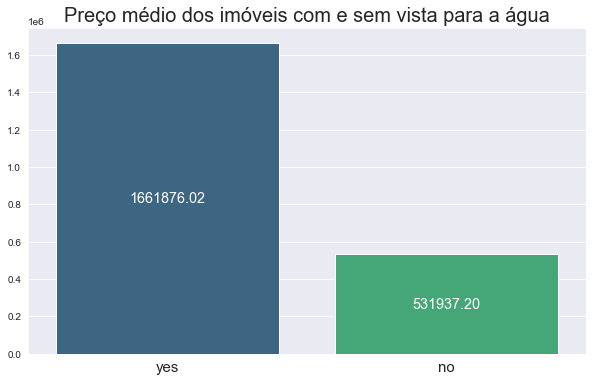

In [10]:
# plot
compartion_graph(['yes','no'],[waterfront_price_median,not_waterfront_price_median],'Preço médio dos imóveis com e sem vista para a água',diff)

### - H2: Imóveis com data de construção menor que 1955 são 50% mais baratos na média

**Falso**, casas não reformadas são **43% mais baratas** em média que casas reformadas

Diferença percentual de Preços 0.62 %


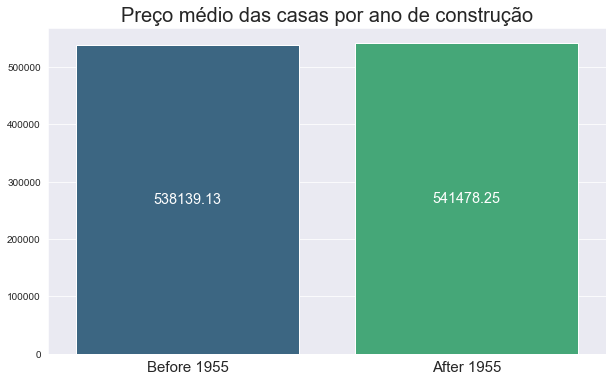

In [11]:
# separando a média entre os imóveis
before1955 = data.loc[data['yr_built'] < 1955,'price'].mean()
after1995 = data.loc[data['yr_built'] >= 1955,'price'].mean()

# diferença percentual
diff = round((after1995 - before1955)*100/before1955,2)
print('Diferença percentual de Preços',diff,'%')

compartion_graph(['Before 1955','After 1955'],[before1955,after1995],'Preço médio das casas por ano de construção',diff)

### H3: Imóveis sem porão possuem área total (sqft_lot) 40% maior que os imóveis com porão

**Falso**, imóveis sem porão possuem área total **19% maior** que imóveis com porão

Diferença percentual de Preços 19.0 %


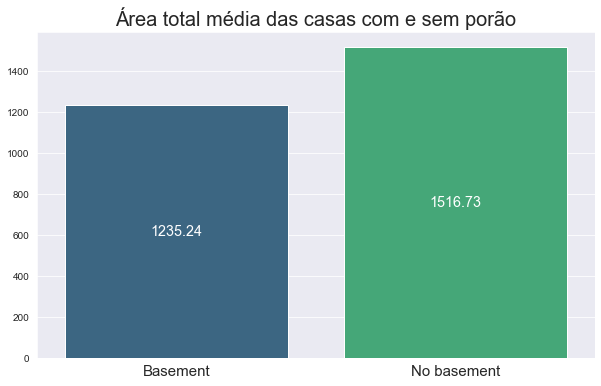

In [12]:
# média do tamanho total de imóveis com e sem porão
basement_sqft_mean = data.loc[ data.sqft_basement != 0, 'sqft_lot'].mean() 
no_basement_sqft_mean = data.loc[ data.sqft_basement == 0, 'sqft_lot'].mean() 

# diferença percentual
diff = round((no_basement_sqft_mean - basement_sqft_mean)/ no_basement_sqft_mean,2)* 100
print('Diferença percentual de Preços',diff,'%')

# plotando
compartion_graph(['Basement','No basement'],[basement_sqft_mean,no_basement_sqft_mean],'Área total média das casas com e sem porão',diff)

### H4: O crescimento do preço dos imóveis YoY (Year over Year) é de 10%

**Falso**, o crescimento de preços YoY é de **0,7%**

In [13]:
# agrupando os preços por ano
df = data[['year','price']].groupby('year').mean().reset_index()

# calculando a variação entre dois anos consecutivos
df['var'] = df['price'].rolling(window=2).apply( lambda x: round((x.iloc[1] / x.iloc[0] -1) * 100,2) )
print('Crescimento de Preços YoY: ',df['var'][1],'%')

Crescimento de Preços YoY:  0.7 %


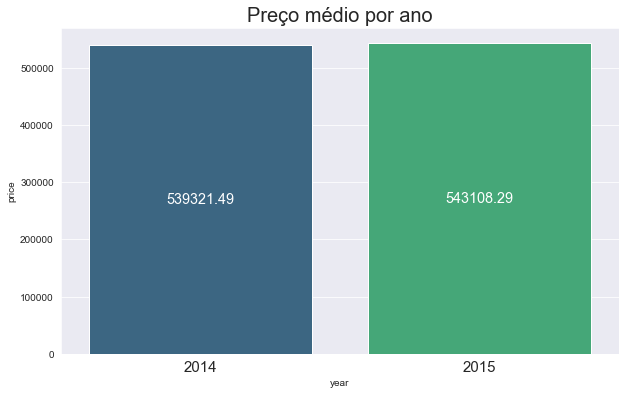

In [14]:
# plot
compartion_graph(df['year'],df['price'],'Preço médio por ano')

### H5: Imóveis com 3 banheiros tem um crescimento MoM (Month over Month) de 15%

**Falso**, o crescimento médio MoM dos imóveis com 3 banheiros no período analisado é de **0,29%**

In [15]:
# calculando variação entre dois meses consecutivos
df2 = data[data['bathrooms'] == 3][['price','month']].groupby('month').mean().reset_index()
df2['var_MoM'] = df2['price'].rolling(window=2).apply( lambda x: (x.iloc[1] / x.iloc[0] -1) * 100 )

# variação média, máxima e mínima
var_MoM_mean = round(df2['var_MoM'].mean(),2)
max_ = round(df2['var_MoM'].max(),2)
min_ = round(df2['var_MoM'].min(),2)
print('A variação média dos preços YoY é de: ',var_MoM_mean,'%')

A variação média dos preços YoY é de:  0.29 %


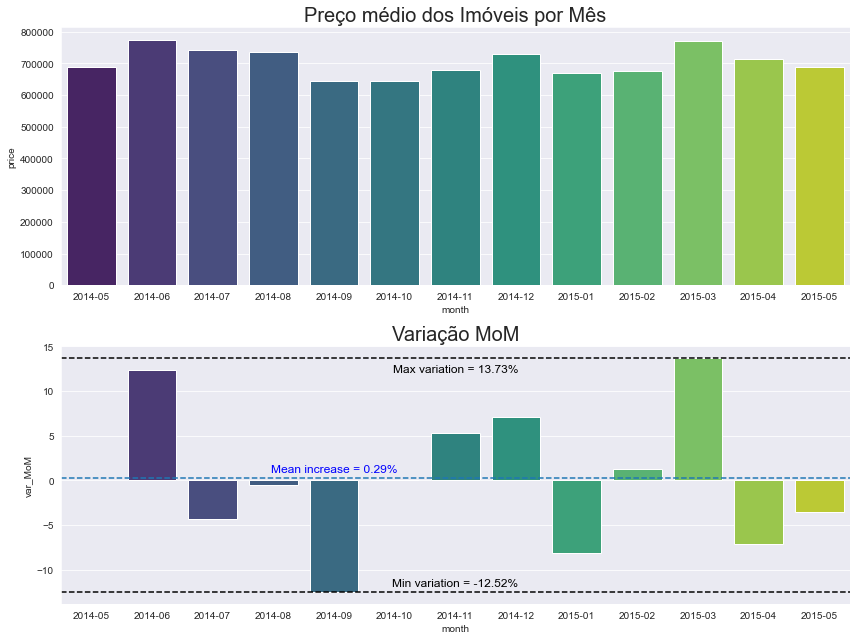

In [16]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(12,9))

##### Plot do prço médio por mês

# criando figure e titulo
axes[0].set_title('Preço médio dos Imóveis por Mês',fontdict={'fontsize': 20})

# plotando grafico
sns.barplot(x=df2['month'],y=df2['price'],palette='viridis',ax=axes[0])

#### Plot da variação do preço médio por mês

# definidno titulo
axes[1].set_title('Variação MoM',fontdict={'fontsize':20})

# plotando gráfico
sns.barplot(x='month',y='var_MoM',data=df2,palette='viridis',ax=axes[1])

# defindo configurações de linha
axes[1].axhline(var_MoM_mean, ls='--')
axes[1].text(4, 1.8, f'Mean increase = {var_MoM_mean}%',
         rotation=0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center',
         color='blue',
        fontsize=12)
axes[1].axhline(df2['var_MoM'].min(), ls='--',color='black')
axes[1].text(6, -11, f'Min variation = {min_}%',
         rotation=0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center',
         color='black',
         fontsize=12)
axes[1].axhline(max_, ls='--',color='black',label='Max variation')
axes[1].text(6, 13, f'Max variation = {max_}%',
         rotation=0,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center',
         color='black',
         fontsize=12)

plt.tight_layout()

### H6: No inverno as casas são em média 30% mais baratas que nas outras estações

**Falso**, no inverno, as casas são em média **4% mais baratas** que nas outras estações

Diferença percentual de Preços 4 %


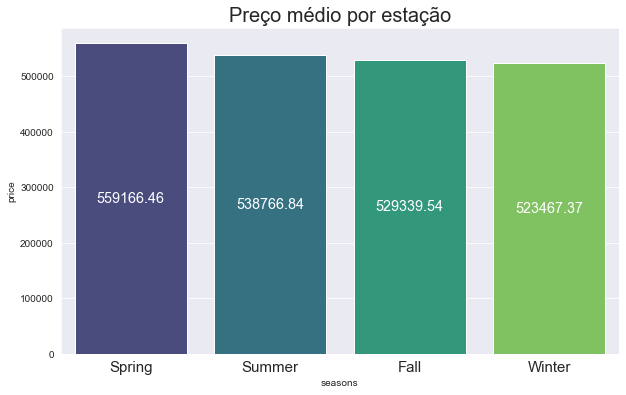

In [17]:
# média do tamanho total de imóveis com e sem porão
winter = data.loc[ data.seasons == 'Winter', 'price'].mean() 
not_winter = data.loc[ data.seasons != 'Winter', 'price'].mean() 

# diferença percentual
diff = round((not_winter - winter)/ winter * 100)
print('Diferença percentual de Preços',diff,'%')

df = data[['seasons','price']].groupby('seasons').mean().sort_values(by='price',ascending=False).reset_index()
compartion_graph(df['seasons'],df['price'],'Preço médio por estação',diff)

### H7: Casas com um alto grau de qualidade e design são até 50% mais caras

**False**, casas com um alto grau de qualidade e design são em média **227% mais caras**

Diferença percentual de Preços 227.54 %


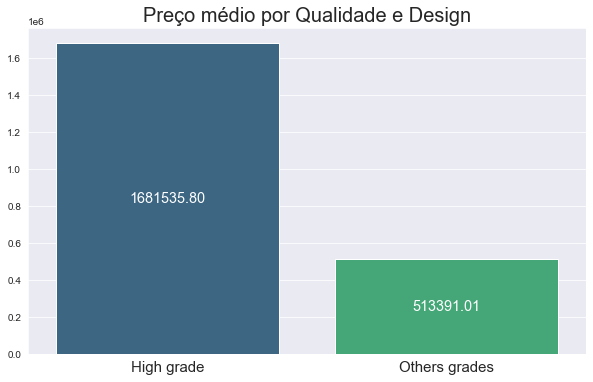

In [18]:
high_grade = round(data.loc[data['grade'] >=11, 'price'].mean(),2)
others_grade = round(data.loc[data['grade'] < 11, 'price'].mean(),2)

diff = round(100*(high_grade - others_grade)/others_grade,2)
print('Diferença percentual de Preços',diff,'%')

compartion_graph(['High grade','Others grades'],[high_grade,others_grade],'Preço médio por Qualidade e Design')

### H8: Imóveis não reformados são 10% mais baratos do que a média dos imóveis reformados por região.

**Falso**, imóveis não reformados são em média **43,52% mais baratos** que imóveis reformados

Diferença percentual de Preços 43.52 %


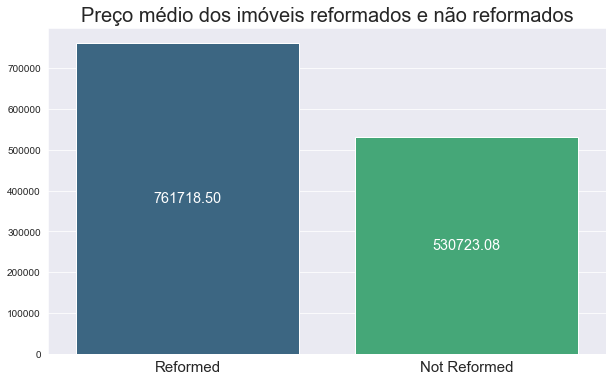

In [19]:
# média do tamanho total de imóveis com e sem porão
reformed = round(data.loc[data['yr_renovated'] > 0, 'price'].mean(),2)
not_reformed = round(data.loc[data['yr_renovated'] == 0, 'price'].mean(),2)

# diferença percentual
diff = round(100*(reformed - not_reformed)/not_reformed,2)
print('Diferença percentual de Preços',diff,'%')

compartion_graph(['Reformed','Not Reformed'],[reformed,not_reformed],'Preço médio dos imóveis reformados e não reformados', diff)

## 5. Solução das questões de negócio

### 5.1) Gerando relatório com as sugestões de compra de imóveis

- Agrupar os dados pela região (zipcode e estação)
- Calcular a mediana do preço dos imóveis por região
- Os imóveis que estão abaixo do preço mediano de cada região e que estejam em boas condições serão indicados para a compra

#### Agrupando dados por região

In [20]:
region_price_median = data[['zipcode','price']].groupby('zipcode').median().reset_index()
region_price_median = region_price_median.rename(columns={'price':'region_price_median'})

region_price_median

,zipcode,region_price_median
0,98001,260000.00
1,98002,235000.00
2,98003,266500.00
3,98004,1150000.00
4,98005,765475.00
...,...,...
65,98177,557000.00
66,98178,279000.00
67,98188,265000.00
68,98198,265000.00


#### Combinando com o Dataframe principal

In [21]:
data = pd.merge(data,region_price_median,on='zipcode',how='inner')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,year,week_of_year,month,day,seasons,region_price_median
0,7129300520,2014-10-13,221900.00,3,1.00,109.63,524.90,1.00,no,0,...,47.51,-122.26,124.49,524.90,2014,42,2014-10,13,Fall,279000.00
1,4060000240,2014-06-23,205425.00,2,1.00,81.75,629.88,1.00,no,0,...,47.50,-122.25,110.55,629.88,2014,26,2014-06,23,Summer,279000.00
2,4058801670,2014-07-17,445000.00,3,2.25,195.10,761.90,1.00,no,2,...,47.51,-122.24,247.12,809.37,2014,29,2014-07,17,Summer,279000.00
3,2976800796,2014-09-25,236000.00,3,1.00,120.77,547.94,1.00,no,0,...,47.51,-122.25,122.63,707.83,2014,39,2014-09,25,Fall,279000.00
4,6874200960,2015-02-27,170000.00,2,1.00,79.90,489.13,1.00,no,0,...,47.50,-122.27,153.29,815.22,2015,9,2015-02,27,Winter,279000.00


#### Recomendação de Compra

In [22]:
data['recommendation'] = data[['price', 'region_price_median','condition']].apply(
        lambda x: 'Buy' if (x['price'] < x['region_price_median']) & (x['condition'] >=4) else 'Not Buy', axis=1)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,year,week_of_year,month,day,seasons,region_price_median,recommendation
0,7129300520,2014-10-13,221900.00,3,1.00,109.63,524.90,1.00,no,0,...,-122.26,124.49,524.90,2014,42,2014-10,13,Fall,279000.00,Not Buy
1,4060000240,2014-06-23,205425.00,2,1.00,81.75,629.88,1.00,no,0,...,-122.25,110.55,629.88,2014,26,2014-06,23,Summer,279000.00,Buy
2,4058801670,2014-07-17,445000.00,3,2.25,195.10,761.90,1.00,no,2,...,-122.24,247.12,809.37,2014,29,2014-07,17,Summer,279000.00,Not Buy
3,2976800796,2014-09-25,236000.00,3,1.00,120.77,547.94,1.00,no,0,...,-122.25,122.63,707.83,2014,39,2014-09,25,Fall,279000.00,Not Buy
4,6874200960,2015-02-27,170000.00,2,1.00,79.90,489.13,1.00,no,0,...,-122.27,153.29,815.22,2015,9,2015-02,27,Winter,279000.00,Not Buy


#### Salvando em csv

In [23]:
houses_recommedations = data[['id','zipcode','condition','price','region_price_median','recommendation']].copy()
houses_recommedations.to_csv('houses_recommendations.csv')

### 5.2) Gerando relatório com as sugestões de venda de um imóvel por um valor recomendado

- Para a decisão do preço de venda são consideradas as três features, o preço de compra, a região e a estação do ano
    - Se o preço de compra for menor que o preço médio da região na determinada estação, o preço de venda será 30% maior que o preço de compra
    - Se for maior, o acrescimo será de 10%

#### Agrupando dados por região e estação

In [24]:
season_price_median = data[['zipcode','seasons','price']].groupby(['zipcode','seasons']).median().reset_index()
season_price_median = season_price_median.rename(columns={'price':'zip_per_region_price_median'})
season_price_median

,zipcode,seasons,zip_per_region_price_median
0,98001,Fall,250000.00
1,98001,Spring,262000.00
2,98001,Summer,260000.00
3,98001,Winter,264975.00
4,98002,Fall,236500.00
...,...,...,...
275,98198,Winter,275000.00
276,98199,Fall,640000.00
277,98199,Spring,715000.00
278,98199,Summer,743250.00


#### Reunindo com o dataframe original

In [25]:
data = pd.merge(data,season_price_median,on=['zipcode','seasons'],how='left',copy=False)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,year,week_of_year,month,day,seasons,region_price_median,recommendation,zip_per_region_price_median
0,7129300520,2014-10-13,221900.00,3,1.00,109.63,524.90,1.00,no,0,...,124.49,524.90,2014,42,2014-10,13,Fall,279000.00,Not Buy,281000.00
1,4060000240,2014-06-23,205425.00,2,1.00,81.75,629.88,1.00,no,0,...,110.55,629.88,2014,26,2014-06,23,Summer,279000.00,Buy,272000.00
2,4058801670,2014-07-17,445000.00,3,2.25,195.10,761.90,1.00,no,2,...,247.12,809.37,2014,29,2014-07,17,Summer,279000.00,Not Buy,272000.00
3,2976800796,2014-09-25,236000.00,3,1.00,120.77,547.94,1.00,no,0,...,122.63,707.83,2014,39,2014-09,25,Fall,279000.00,Not Buy,281000.00
4,6874200960,2015-02-27,170000.00,2,1.00,79.90,489.13,1.00,no,0,...,153.29,815.22,2015,9,2015-02,27,Winter,279000.00,Not Buy,265000.00


#### Adicionando Features

In [26]:
# Preço de venda recomendado
data['sell_price'] = data[['price','zip_per_region_price_median','seasons']].apply(lambda x: x['price']*1.3 if (x['price'] < x['zip_per_region_price_median']) else
                                                                            x['price']*1.1,axis=1)

# calculando o lucro
data['profit'] =  round( data['sell_price'] - data['price'], 1)

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,year,week_of_year,month,day,seasons,region_price_median,recommendation,zip_per_region_price_median,sell_price,profit
0,7129300520,2014-10-13,221900.00,3,1.00,109.63,524.90,1.00,no,0,...,2014,42,2014-10,13,Fall,279000.00,Not Buy,281000.00,288470.00,66570.00
1,4060000240,2014-06-23,205425.00,2,1.00,81.75,629.88,1.00,no,0,...,2014,26,2014-06,23,Summer,279000.00,Buy,272000.00,267052.50,61627.50
2,4058801670,2014-07-17,445000.00,3,2.25,195.10,761.90,1.00,no,2,...,2014,29,2014-07,17,Summer,279000.00,Not Buy,272000.00,489500.00,44500.00
3,2976800796,2014-09-25,236000.00,3,1.00,120.77,547.94,1.00,no,0,...,2014,39,2014-09,25,Fall,279000.00,Not Buy,281000.00,306800.00,70800.00
4,6874200960,2015-02-27,170000.00,2,1.00,79.90,489.13,1.00,no,0,...,2015,9,2015-02,27,Winter,279000.00,Not Buy,265000.00,221000.00,51000.00


In [27]:
sugestion_sell = data[['id','price','zipcode','price','zip_per_region_price_median','sell_price','profit']].copy()

sugestion_sell.to_csv('sugestion_sell.csv')

In [28]:
data.dtypes

id                                      int64
date                           datetime64[ns]
price                                 float64
bedrooms                                int64
bathrooms                             float64
sqft_living                           float64
sqft_lot                              float64
floors                                float64
waterfront                             object
view                                    int64
condition                               int64
grade                                   int64
sqft_above                              int64
sqft_basement                           int64
yr_built                                int64
yr_renovated                            int64
zipcode                                 int64
lat                                   float64
long                                  float64
sqft_living15                         float64
sqft_lot15                            float64
year                              

## 6. Resultados para o Negócio 

#### Caso todas as casas sejam compradas e revendidas no preço sugerido, qual seria o retorno?

In [29]:
profit = data['profit'].sum()
investment = data['price'].sum()
sales = data['sell_price'].sum()

In [30]:
profit = str(int(profit))

dolares = profit[-3::]
milhares = profit[-6:-3]
milhoes = profit[-9:-6]
bilhoes = profit[-12:-9]
print('O retorno esperado após a revenda de todos os imóveis é de', bilhoes,'bilhão,', milhoes, 'milhões,', milhares, 'mil,',dolares,'dolares')

O retorno esperado após a revenda de todos os imóveis é de 1 bilhão, 976 milhões, 109 mil, 396 dolares


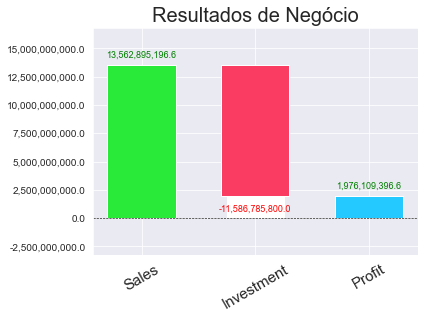

In [34]:
results = pd.DataFrame({'price':[sales,-investment]}, index=['Sales','Investment'])
import waterfall_chart

waterfall_chart.plot(results.index, results['price'],net_label='Profit')

plt.xticks(fontsize=15)
plt.title('Resultados de Negócio', fontsize=20);